**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [16]:
from __future__ import print_function, division
import matplotlib.pylab as plt
import numpy as np
import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

Text(0.5,1,'Line with slope = 0.75 and uncertanity ')

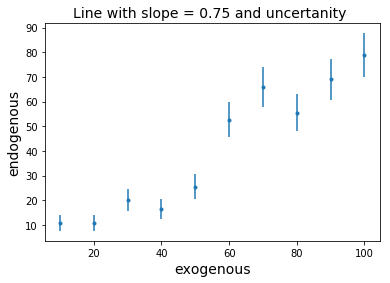

In [42]:
# Define x
lis_x = np.linspace(start = 10, stop = 100, num = 10)

# Obatin y using line and error function
lis_y = line(a = 0.75, x = lis_x, errors = errors)

# Plot x and y
plt.errorbar(lis_x, lis_y, yerr = errors(lis_y), fmt='.')
plt.xlabel('exogenous', fontsize=14)
plt.ylabel('endogenous', fontsize=14)
plt.title('Line with slope = 0.75 and uncertanity ', fontsize=14)

#### Fig 1:
The points in plot above are drawn from a line of slope 0.75 added with some uncertanity. The errorbar show the uncertainity corresponding to each point.

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [46]:
print( " y : ", lis_y)
print( " x : ", lis_x)
lis_xWithConstants =sm.add_constant(lis_x)
print(" x after adding constants: ", lis_xWithConstants)

 y :  [ 10.82512284  10.8288602   20.20987899  16.48986166  25.43354879
  52.70944351  65.88260477  55.54223243  69.0004726   78.85169997]
 x :  [  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]
 x after adding constants:  [[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


# 4. plot the data (as points) and both statsmodels fits

Text(0.5,1,'Original data with fitted regression line')

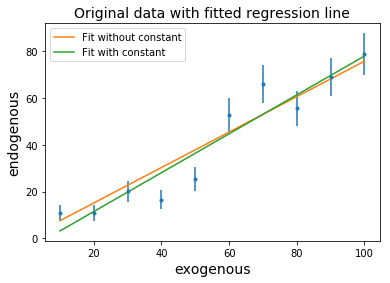

In [59]:
# Create predictions
lis_yPredW = mod_smfitW.predict(lis_x)
lis_yPredR = mod_smfitR.predict(lis_xWithConstants)

# Create plots
plt.errorbar(lis_x, lis_y, yerr = errors(lis_y), fmt='.')
plt.xlabel('exogenous', fontsize=14)
plt.ylabel('endogenous', fontsize=14)

ax1 = plt.plot(lis_x, lis_yPredW, '-', label='Fit without constant')
ax2 = plt.plot(lis_x, lis_yPredR, '-', label='Fit with constant')

plt.legend()


plt.title('Original data with fitted regression lines', fontsize=14)

#### Fig2:

1. The above graph shows the original data points fitted with regression lines from models with constants and withouth constants.
2. From the graph we can see the line of model with constant is passing through the origin whereas, the other is not. Adding constant to model helps to address the need of intercept in regression line.

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Text(0.5,1,'Line with slope = 0.75, intercept = 76 and uncertanity ')

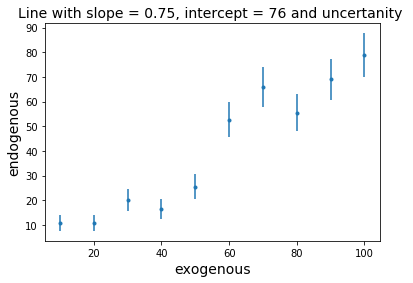

In [61]:
# Obatin y using line and error function
lis_y2 = line(a = 0.75, b=76, x = lis_x, errors = errors)

# Plot x and y
plt.errorbar(lis_x, lis_y, yerr = errors(lis_y), fmt='.')
plt.xlabel('exogenous', fontsize=14)
plt.ylabel('endogenous', fontsize=14)
plt.title('Line with slope = 0.75, intercept = 76 and uncertanity ', fontsize=14)

#### Fig3:
The points in plot above are drawn from a line of slope 0.75, intecept 76 and added with some uncertanity. The errorbar show the uncertainity corresponding to each point.

# 6. repeat step 3

In [62]:
#THE WRONG WAY
mod_smfitW2 = smf.OLS(lis_y2, lis_x).fit()
mod_smfitW2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     83.03
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           7.71e-06
Time:                        01:58:22   Log-Likelihood:                -50.208
No. Observations:                  10   AIC:                             102.4
Df Residuals:                       9   BIC:                             102.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.7949      0.197      9.112      0.000         1.349     2.241
==============================================================================
Omnibus:                        0.923   Durbin-Watson:                   0.128
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.756
Skew:                          -0.458   Prob(JB):                        0.685
Kurtosis:                       2.013   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#THE RIGHT WAY
mod_smfitR2 = smf.OLS(lis_y2, lis_xWithConstants).fit()
mod_smfitR2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.74
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           5.59e-05
Time:                        01:59:02   Log-Likelihood:                -33.937
No. Observations:                  10   AIC:                             71.87
Df Residuals:                       8   BIC:                             72.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         77.6670      5.503     14.115      0.000        64.978    90.356
x1             0.6854      0.089      7.729      0.000         0.481     0.890
==============================================================================
Omnibus:                        3.914   Durbin-Watson:                   1.110
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                1.105
Skew:                           0.151   Prob(JB):                        0.575
Kurtosis:                       1.400   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [70]:
w = errors(lis_x)
mod_wls = sm.WLS(lis_y2, lis_xWithConstants, weights=1./w).fit()
print(mod_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            WLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     82.65
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           1.72e-05
Time:                        02:05:39   Log-Likelihood:                -33.440
No. Observations:                  10   AIC:                             70.88
Df Residuals:                       8   BIC:                             71.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         74.6683      4.315     17.304      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

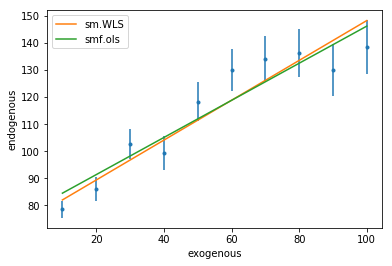

In [74]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':np.array(lis_x), 'y':np.array(lis_y2), 'const':np.ones(len(lis_x))}).fit()
pl.errorbar(lis_x, lis_y2, yerr=errors(lis_x), fmt='.')
pl.plot(lis_x, mod_wls.fittedvalues, '-', label="sm.WLS")
pl.plot(lis_x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();